## GridSearchCV

- Bad parformance
- Don't scale too good

## RandomizedSearchCV

- Useful to point out to the best direction
- Don't follow tha path that tries every possible combination of params

## BayesSearchCV

- use stepwise Bayesian Optimization to explore the most promising hyperparameters in the problem-space.
- finding a minimum to an objective function in large problem-spaces
- uses Gaussian Process regression
- objective function here: to arrive the best model output given the model-parameters
- allow us to test a larger range of values, because in practices it will explore just the promising ones


In [8]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import ensemble
from sklearn import pipeline
from skopt import space
from skopt import BayesSearchCV

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
diabetes_data = datasets.load_diabetes()
diabetes_df = pd.DataFrame(
    data=np.c_[diabetes_data['data'], diabetes_data['target']], 
    columns=diabetes_data["feature_names"] + ['target'])

In [5]:
diabetes_df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.017646   151.0  
1   -0.039493 -0.068330 -0.092204    75.0  
2   -0.002592  0.002864 -0.025930   141.0  
3    0.034309  0.022692 -0.009362   206.0  
4   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  

[442 rows x 11 columns]

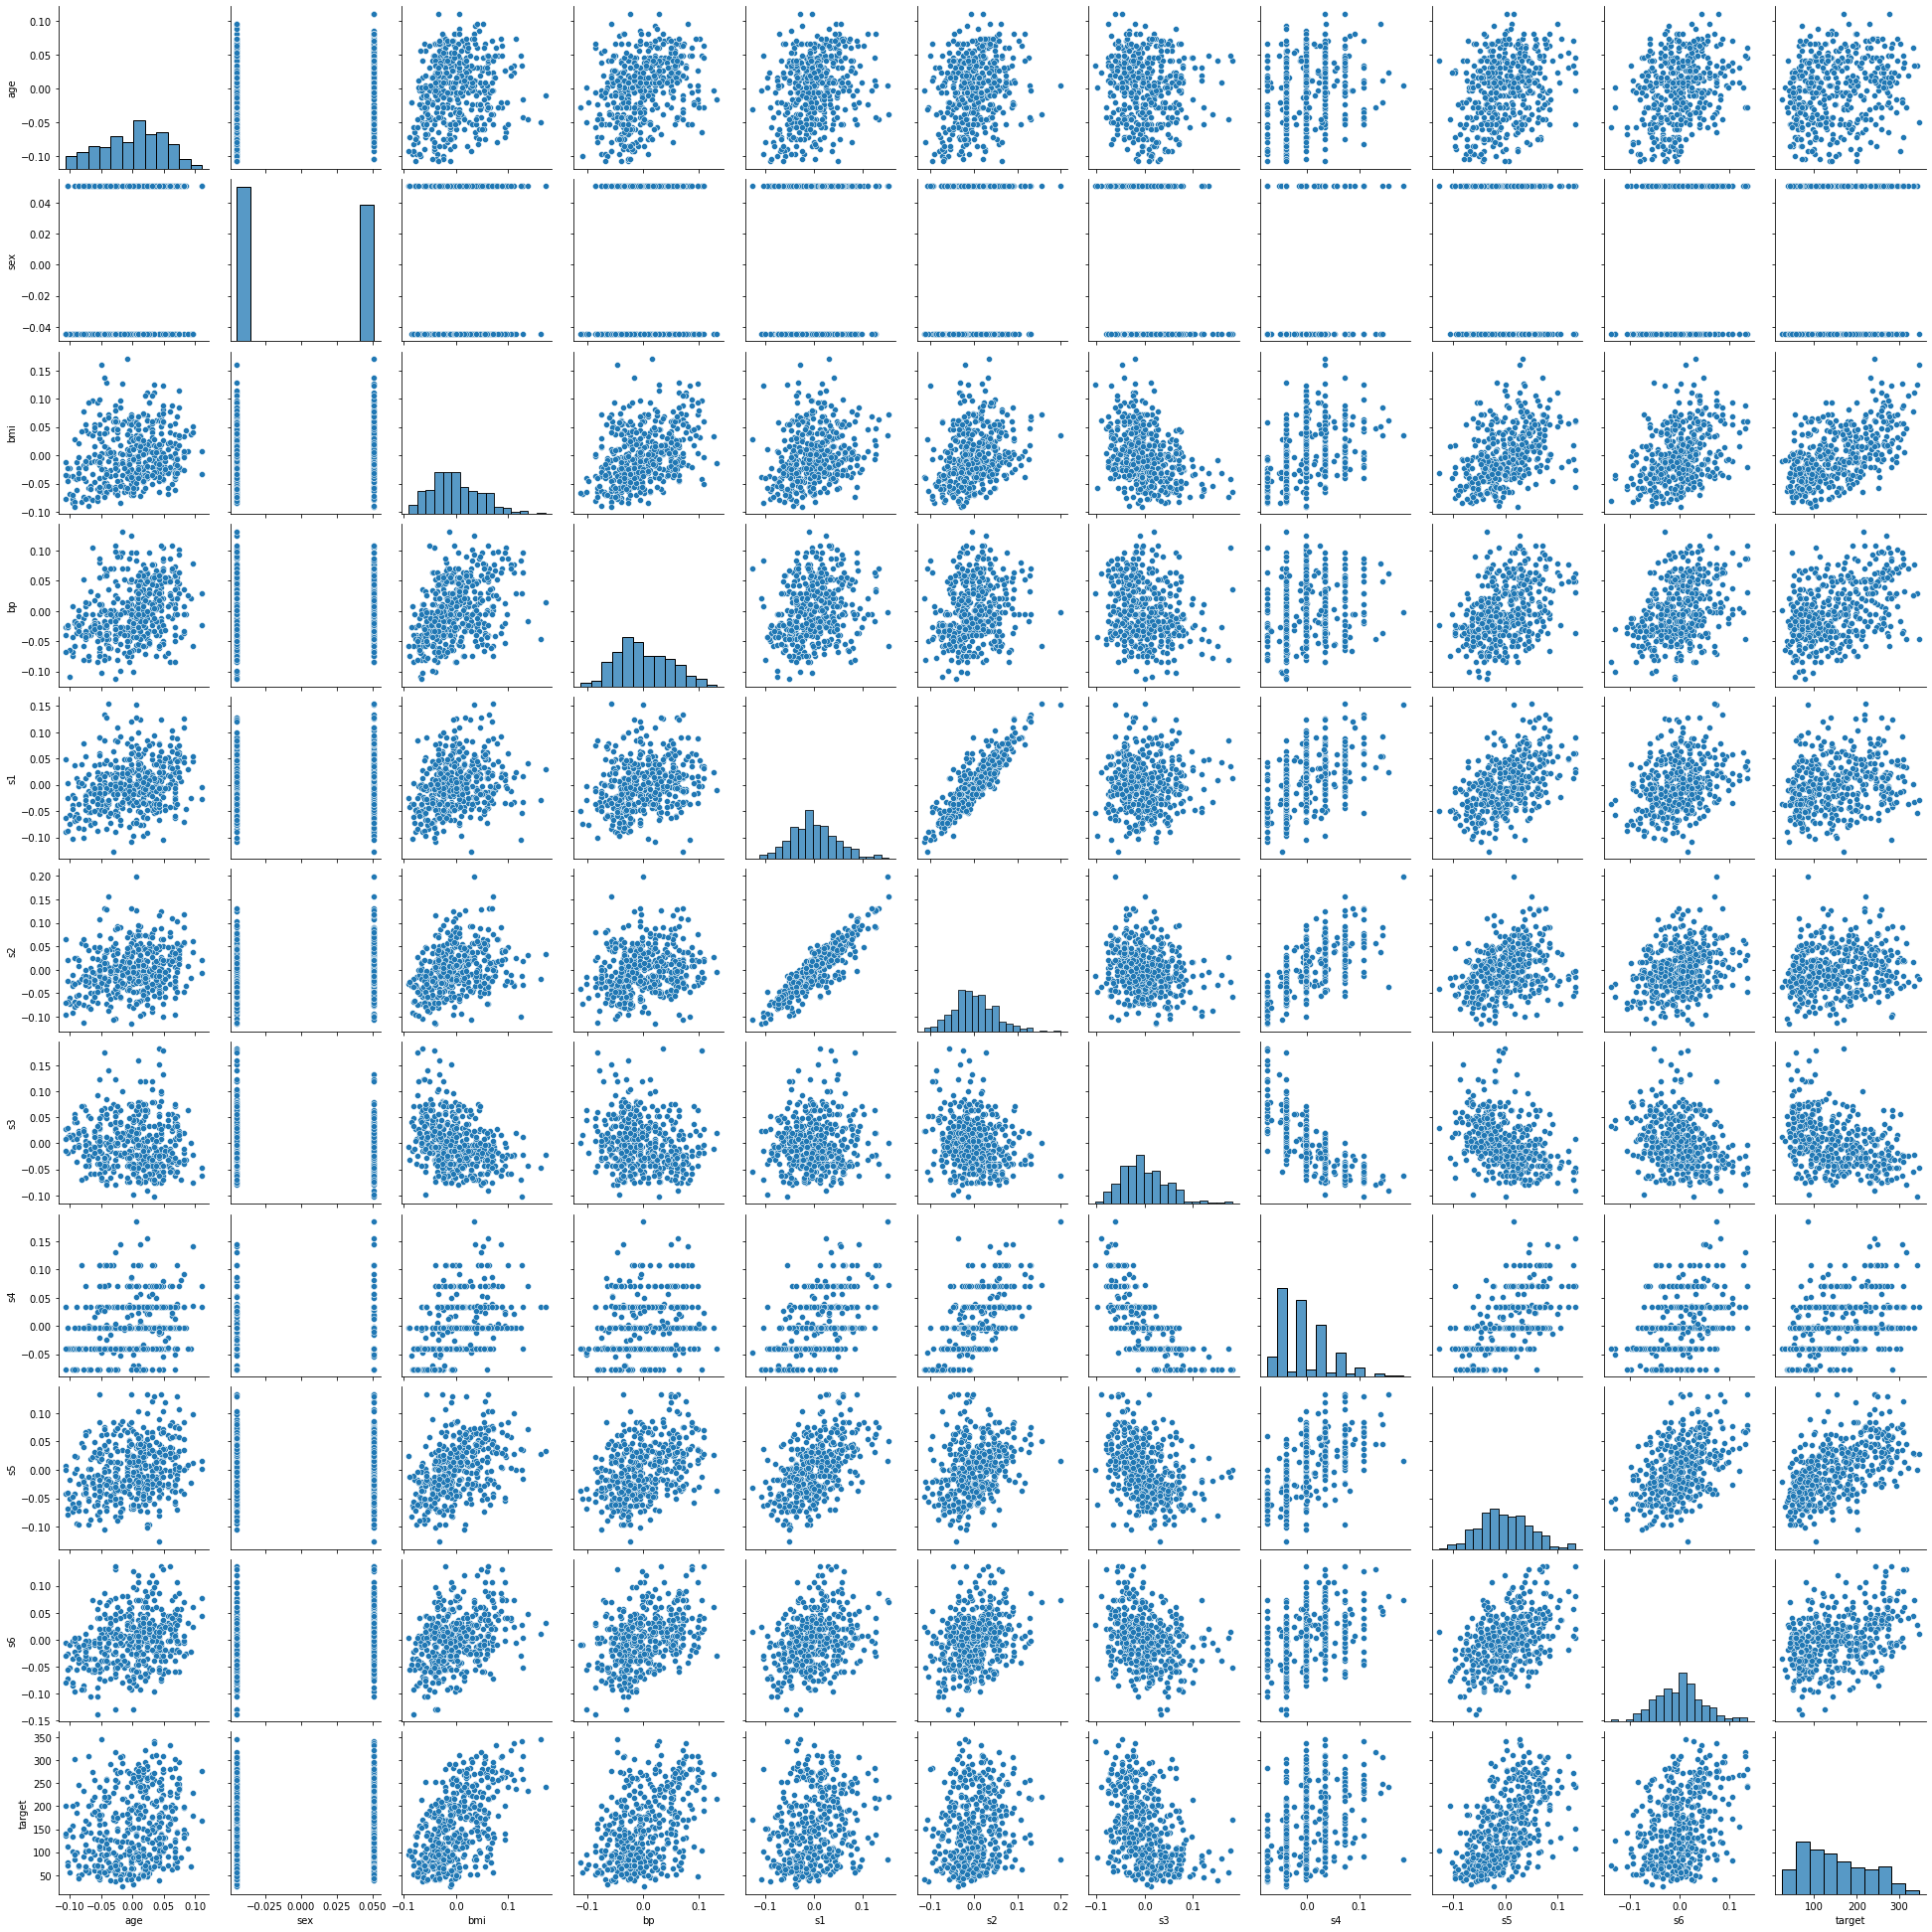

In [6]:
_ = sns.pairplot(diabetes_df)
plt.show()

We're seeing some interactions on the s-columns, some levels of correlation.


In [7]:
# lets build our pipeline

# train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    diabetes_df.drop(["target"], axis=1),
    diabetes_df.target,
    test_size=0.2,
    random_state=21,
)



We need three elements to build a pipeline:

1. Models to be optimized
2. sklearn Pipeline
3. skopt optimization procedure 

In [10]:
# boosting models: AdaBoost and GradientBoosted
# defining the search space

ada_search = {
    "model": [ensemble.AdaBoostRegressor()],
    "model__learning_rate": space.Real(0.005, 0.9, prior="log-uniform"),
    "model__n_estimators": space.Integer(1, 1000),
    "model__loss": space.Categorical(["linear", "square", "exponential"]),
}

gb_search = {
    "model": [ensemble.GradientBoostingRegressor()],
    "model__learning_rate": space.Real(0.005, 0.9, prior="log-uniform"),
    "model__n_estimators": space.Integer(1, 1000),
    "model__loss": space.Categorical(["ls", "lad", "quantile"]),
}


We need to select over which regression model to pick through another model.

In [ ]:
pipe = pipeline.Pipeline([('model', ensemble.GradientBoostingRegressor())])

# now we optimize over our search-space
opt = BayesSearchCV(
    pipe, 
    [(ada_search, 100), (gb_search, 100)],
    cv=5,
    verbose=10,
    n_jobs=-1
)

opt.fit(X_train, y_train)

In [14]:
print(f'Validation score: {opt.best_score_}')
print(f'test score: {opt.score(X_test, y_test)}')
print(f'best params: {opt.best_params_}')

Validation score: 0.4675755161412264
test score: 0.36630346492921917
best params: OrderedDict([('model', AdaBoostRegressor(learning_rate=0.011615803119471092, loss='exponential',
                  n_estimators=613)), ('model__learning_rate', 0.011615803119471092), ('model__loss', 'exponential'), ('model__n_estimators', 613)])


In [16]:
opt.optimizer_results_[0]

          fun: -0.4675755161412264
    func_vals: array([-0.46249503, -0.45336638, -0.44405883, -0.45262874, -0.46386025,
       -0.44394962, -0.45664098, -0.44387922, -0.45311807, -0.45371149,
       -0.43703035, -0.46186487, -0.46302087, -0.45919098, -0.44814192,
       -0.45900273, -0.46473608, -0.46103943, -0.46031052, -0.23673461,
       -0.45457717, -0.46005798, -0.45247164, -0.4364475 , -0.42861477,
       -0.44940626, -0.45710444, -0.45539459, -0.42995539, -0.45080317,
       -0.46191094, -0.45912678, -0.43612439, -0.437068  , -0.43005387,
       -0.46208606, -0.46128789, -0.45316347, -0.46506923, -0.46132033,
       -0.45812491, -0.45611018, -0.46148581, -0.45940733, -0.46109533,
       -0.45451115, -0.46234304, -0.45579704, -0.46214709, -0.45142296,
       -0.46229976, -0.46053403, -0.46097557, -0.45739445, -0.45856795,
       -0.45467064, -0.46041828, -0.46240546, -0.43478318, -0.46202423,
       -0.44916644, -0.44694717, -0.45960228, -0.46006748, -0.45826636,
       -0.4639

In [ ]:
# we can also specify an objective function ourselfs
# we have on skopt some functions visualizations to plot

ref: https://towardsdatascience.com/optimizing-hyperparameters-the-right-way-3c9cafc279cc
